## 1.1 - Data Exploration

### Reading the data

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_bj = pd.read_csv('./data/assignment5/Beijing.csv')
df_cd = pd.read_csv('./data/assignment5/Chengdu.csv')
df_gz = pd.read_csv('./data/assignment5/Guangzhou.csv')
df_sh = pd.read_csv('./data/assignment5/Shanghai.csv')
df_sy = pd.read_csv('./data/assignment5/Shenyang.csv')

In [3]:
# Peek at data for Beijing
df_bj.head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,1.79,0.0,0.0
1,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,4.92,0.0,0.0
2,2010,1,1,2,4,NaN,-21.0,43.0,1019.0,-11.0,6.71,0.0,0.0
3,2010,1,1,3,4,NaN,-21.0,55.0,1019.0,-14.0,9.84,0.0,0.0
4,2010,1,1,4,4,NaN,-20.0,51.0,1018.0,-12.0,12.97,0.0,0.0


In [4]:
df_list = [
    ['Beijing', df_bj.copy()], 
    ['Chengdu', df_cd.copy()], 
    ['Guangzhou', df_gz.copy()], 
    ['Shanghai', df_sh.copy()], 
    ['Shenyang', df_sy.copy()]
]

df_list_untouched = [
    ['Beijing', df_bj.copy()], 
    ['Chengdu', df_cd.copy()],
    ['Guangzhou', df_gz.copy()], 
    ['Shanghai', df_sh.copy()], 
    ['Shenyang', df_sy.copy()]
]

Need to fix missing values in season

In [5]:
month_season_dict = {
    1: 4,
    2: 4,
    3: 1,
    4: 1,
    5: 1,
    6: 2,
    7: 2,
    8: 2,
    9: 3,
    10: 3,
    11: 3,
    12: 4
}

# Fill in season column by refering to month column
for city, df in df_list:
    df['season'] = [month_season_dict[x] for x in df['month']]

In [6]:
season_dict = { 
    1: "Spring", 
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

# Add 'season_in_text' column
for city, df in df_list:
    df['season_in_text'] = [season_dict[x] for x in df['season']]

### City with the Largest Temperature Range

In [7]:
def find_largest_temp_range(dfs):
    """Find the city with the largest temperature range"""
    max_temp_diff = 0
    max_city = ""
    for city, df in dfs:
        temp_diff = max(df['TEMP']) - min(df['TEMP'])
        if temp_diff >= max_temp_diff:
            max_temp_diff = temp_diff
            max_city = city
    return max_city, max_temp_diff
            
find_largest_temp_range(df_list)

('Shenyang', 63.0)

**Shenyang** has the largest temperature range during the time period the dataset is collected.

### Most and Least Polluted Cities of the 5

In [8]:
def most_least_polluted(standard, dfs):
    """Find the most and least polluted cities by the ratio of polluted days over the period"""
    most_polluted_ratio = 0
    least_pulluted_ratio = 1
    most_polluted_city = ""
    lest_polluted_city = ""
    for city, df in dfs:
        df_pm = df.groupby(['year','month','day'])['PM'].mean().reset_index()
        pm_ratio = round(df_pm[(df_pm['PM'] > standard)].count().reset_index().iloc[3][0] / df_pm.count().reset_index().iloc[3][0],
                         4)
        if pm_ratio > most_polluted_ratio:
            most_polluted_ratio = pm_ratio
            most_polluted_city = city
        if pm_ratio < least_pulluted_ratio:
            least_polluted_ratio = pm_ratio
            least_polluted_city = city
    return most_polluted_city, most_polluted_ratio, least_polluted_city, least_polluted_ratio

In [9]:
most_least_polluted(35, df_list)

('Chengdu', 0.9021, 'Shenyang', 0.7835)

Using the U.S. standard of the 24-hour average PM<sub>2.5</sub> (35 ug/m<sup>3</sup>) and finding the ratio of days exceeding this standard over the period, we can find that **Chengdu is the most polluted city (90.21% of the period)** and **Shenyang is the least polluted city (78.35% of the period)** of the 5 cities.

In [10]:
most_least_polluted(75, df_list)

('Beijing', 0.4998, 'Shenyang', 0.3655)

If we use the **maximum** 24-hour average PM<sub>2.5</sub> (75 ug/m<sup>3</sup>) set by the Chinese government, we can find that **the most polluted city becomes Beijing (49.98% of the period)** and **Shenyang is still the least polluted city (36.55% of the period)** of the 5 cities.

### Average Temperature by Season, Hottest Summer, and Coldest Winter

In [11]:
def average_temp_by_season(dfs):
    """Calculate average temperature by season"""
    res = []
    for city, df in dfs:
        season_avg = df.groupby(['season_in_text'])[['TEMP', 'season']].mean().sort_values(by=['season'], ascending=True).reset_index().drop('season', axis=1)
        res.append((city, season_avg))
    return res

In [12]:
# df_bj.groupby(['season_in_text'])[['TEMP', 'season']].mean().sort_values(by=['season'], ascending=True).reset_index().drop('season', axis=1)

In [13]:
average_temp_by_season(df_list)

[('Beijing',
    season_in_text       TEMP
  0         Spring  14.008455
  1         Summer  25.852710
  2           Fall  12.623598
  3         Winter  -2.434568),
 ('Chengdu',
    season_in_text       TEMP
  0         Spring  18.258194
  1         Summer  25.966364
  2           Fall  18.356543
  3         Winter   8.052331),
 ('Guangzhou',
    season_in_text       TEMP
  0         Spring  21.906167
  1         Summer  28.203261
  2           Fall  23.635798
  3         Winter  14.099237),
 ('Shanghai',
    season_in_text       TEMP
  0         Spring  15.982709
  1         Summer  27.705798
  2           Fall  19.765703
  3         Winter   6.227308),
 ('Shenyang',
    season_in_text       TEMP
  0         Spring   9.456422
  1         Summer  23.612061
  2           Fall   9.809549
  3         Winter  -9.199953)]

Above result shows the cities with their corresponding average temperature for each season.

In [14]:
def count_days_with_temp(dfs, hot_temp, cold_temp):
    res = []
    for city, df in dfs:
        hot_days = sum((df[(df['season'] == 2)].groupby(['year','month','day'])['TEMP'].mean().reset_index()['TEMP'] > hot_temp))
        cold_days = sum((df[(df['season'] == 4)].groupby(['year','month','day'])['TEMP'].mean().reset_index()['TEMP'] < cold_temp))
        res.append((city, hot_days, cold_days))
    return res

In [15]:
data = count_days_with_temp(df_list, 27, 5)

In [16]:
df = pd.DataFrame(data, columns=['city','hot_summer_days','cold_winter_days'])
df

,city,hot_summer_days,cold_winter_days
0,Beijing,180,536
1,Chengdu,199,69
2,Guangzhou,426,1
3,Shanghai,328,202
4,Shenyang,17,538


Personally, I define any days above 27<sup>o</sup>C and under 10<sup>o</sup>C as hot and cold days, respectively. In that sense, hottest summers should have the highest number of hot days, whereas coldest winters should have the highest number of cold days.

By counting the number of hot days in summer and cold days in winter that meet this criteria, we can observe that **Guangzhou has the hottest summers, with 426 hot days observed,** while **Shenyang has the coldest winters, with 538 cold days observed** (although Beijing comes pretty close on this one). This actually matches our observation from the previous section, where **Guangzhou has the highest average temperature of 28<sup>o</sup>C in the summer** and **Shenyang has the lowest average temperature of -9<sup>o</sup>C in the winter**.

### Features with Missing Values

In [17]:
def count_nulls(dfs):
    res = [0] * 14
    for city, df in dfs:
        for i in range(len(df.columns)):
            res[i] += df.iloc[:,i].isna().sum()
    return res

In [18]:
null_count = count_nulls(df_list_untouched)

In [19]:
data_tuples = list(zip(df_bj.columns.values, null_count))

In [20]:
pd.DataFrame(data_tuples, columns=['Feature','Count of Missing Values']).sort_values(by=['Count of Missing Values'], ascending=False)

,Feature,Count of Missing Values
5,PM,95562
11,precipitation,20212
12,Iprec,20212
8,PRES,1581
7,HUMI,1568
10,Iws,1243
6,DEWP,1240
9,TEMP,1238
4,season,1
0,year,0


**PM<sub>2.5</sub>** appears to be the feature with the most missing values.

---
## 1.2 - Visualization

In [21]:
for city, df in df_list:
    df.set_index(pd.to_datetime(df[["year","month","day","hour"]]), inplace=True)

In [22]:
# Dataset for Beijing after resetting index as a combination of date-time
df_list[0][1].head()

,year,month,day,hour,season,PM,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,season_in_text
2010-01-01 00:00:00,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,1.79,0.0,0.0,Winter
2010-01-01 01:00:00,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,4.92,0.0,0.0,Winter
2010-01-01 02:00:00,2010,1,1,2,4,NaN,-21.0,43.0,1019.0,-11.0,6.71,0.0,0.0,Winter
2010-01-01 03:00:00,2010,1,1,3,4,NaN,-21.0,55.0,1019.0,-14.0,9.84,0.0,0.0,Winter
2010-01-01 04:00:00,2010,1,1,4,4,NaN,-20.0,51.0,1018.0,-12.0,12.97,0.0,0.0,Winter


In [23]:
import matplotlib.pyplot as plt

### Linear Chart - Temperature in Guangzhou

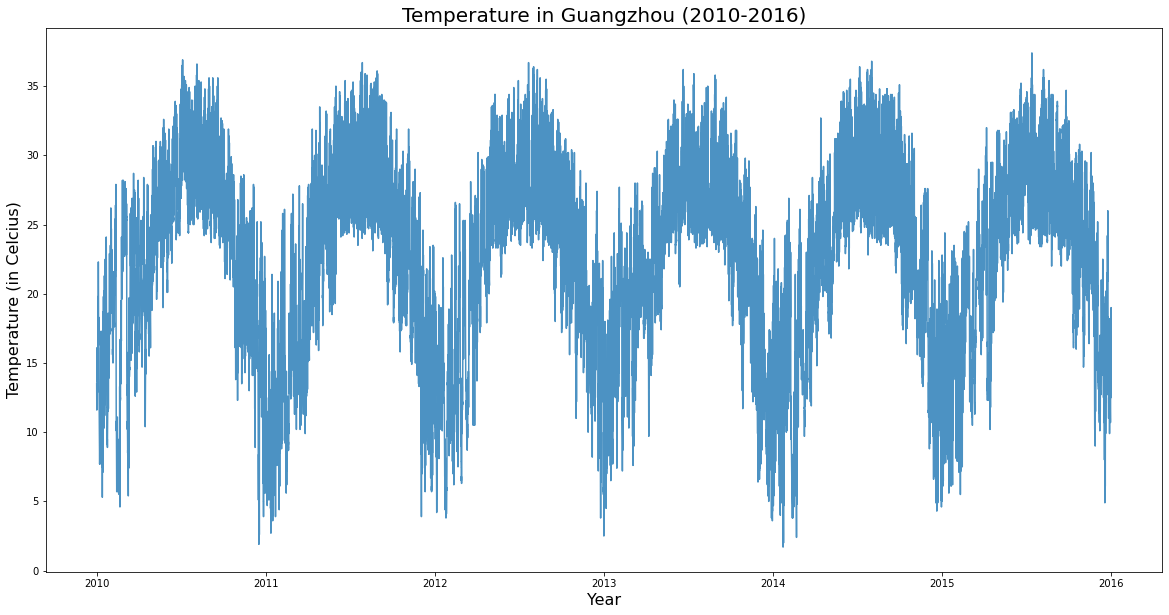

In [24]:
plt.figure(figsize=(20, 10))
plt.plot(df_list[2][1]['TEMP'], alpha=0.8)
plt.title('Temperature in Guangzhou (2010-2016)', fontsize=20)  
plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature (in Celcius)', fontsize=16)
plt.show()

From the figure, we can clearly see a seasonal pattern, in which the temperature reaches the low points during the winters and the high points during the summers.

### Boxplot - Aggregated Temperature by Month in Beijing

In [25]:
df_bj.groupby('month').agg(['min', 'max', 'mean', 'median'])['TEMP'].reset_index()

,month,min,max,mean,median
0,1,-19.0,13.0,-4.015457,-4.0
1,2,-16.0,16.0,-1.153107,-1.0
2,3,-9.0,26.0,6.444544,6.0
3,4,-1.0,32.0,14.253009,14.0
4,5,6.0,42.0,21.334005,21.0
5,6,13.0,38.0,24.601065,24.0
6,7,16.0,41.0,27.092294,27.0
7,8,14.0,37.0,25.824109,26.0
8,9,6.0,34.0,20.095370,20.0
9,10,-2.0,27.0,13.136201,13.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


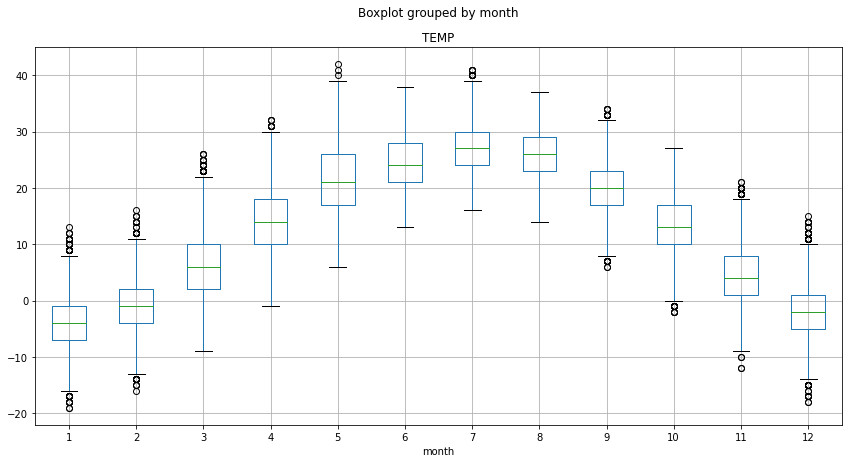

In [26]:
df_bj.boxplot('TEMP', by='month', figsize=(14, 7));

### Scatter Plot - Possible Correlation between Month and PM<sub>2.5</sub> Concentration Level?

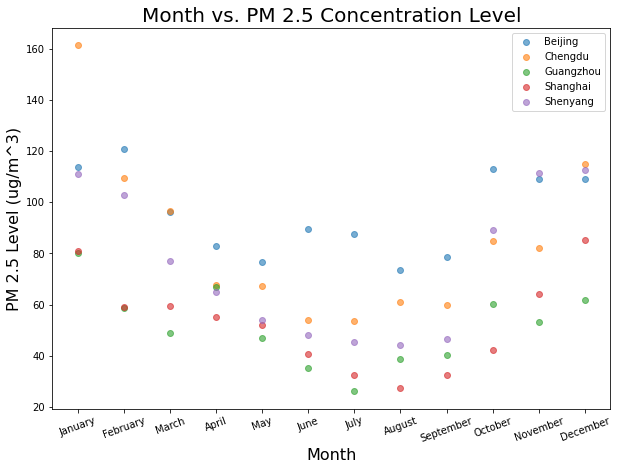

In [27]:
fig = plt.figure(figsize=(10,7))
ax = axes()
for city, df in df_list:
    plt.plot(df.groupby('month')['month'].mean(), df.groupby('month')['PM'].mean(), 
             marker="o", linestyle="", label=city, alpha=0.6)

plt.title('Month vs. PM 2.5 Concentration Level', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('PM 2.5 Level (ug/m^3)', fontsize=16)
locs, labels = xticks()
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
       rotation=20)
plt.legend();

Based on the scatter plot, **it appears that there's slight correlation between the month and the PM<sub>2.5</sub> concentration level**. During the colder months (i.e. from November to Febrary), the PM<sub>2.5</sub> concentration level is higher than the warmer months (i.e. from May to September).

### Linear Chart - PM<sub>2.5</sub> Concentration Level over Time

In [28]:
df_list[0][1]['PM']

2010-01-01 00:00:00      NaN
2010-01-01 01:00:00      NaN
2010-01-01 02:00:00      NaN
2010-01-01 03:00:00      NaN
2010-01-01 04:00:00      NaN
                       ...  
2015-12-31 19:00:00    133.0
2015-12-31 20:00:00    169.0
2015-12-31 21:00:00    203.0
2015-12-31 22:00:00    212.0
2015-12-31 23:00:00    235.0
Name: PM, Length: 52584, dtype: float64

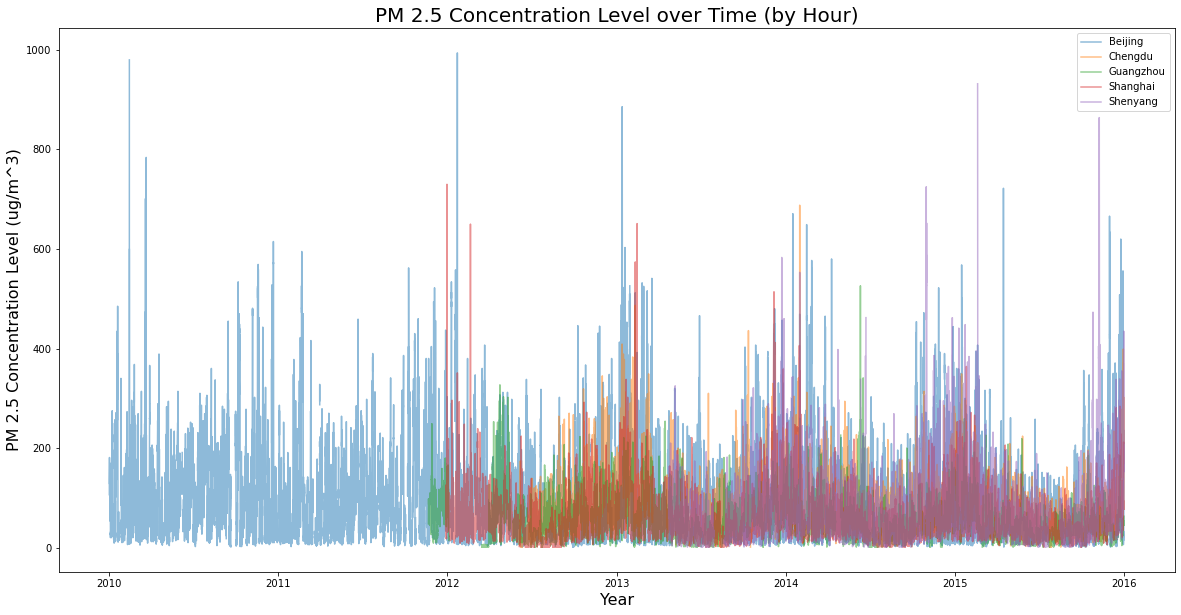

In [29]:
plt.figure(figsize=(20, 10))
ax = axes()

for city, df in df_list:
    plt.plot(df['PM'], label=city, alpha=0.5)
plt.title('PM 2.5 Concentration Level over Time (by Hour)', fontsize=20)  
plt.xlabel('Year', fontsize=16)
plt.ylabel('PM 2.5 Concentration Level (ug/m^3)', fontsize=16)
plt.legend()
plt.show()

The plot above appears to be quite messy visually. In the cell below I tried plot each series in its own subplot.

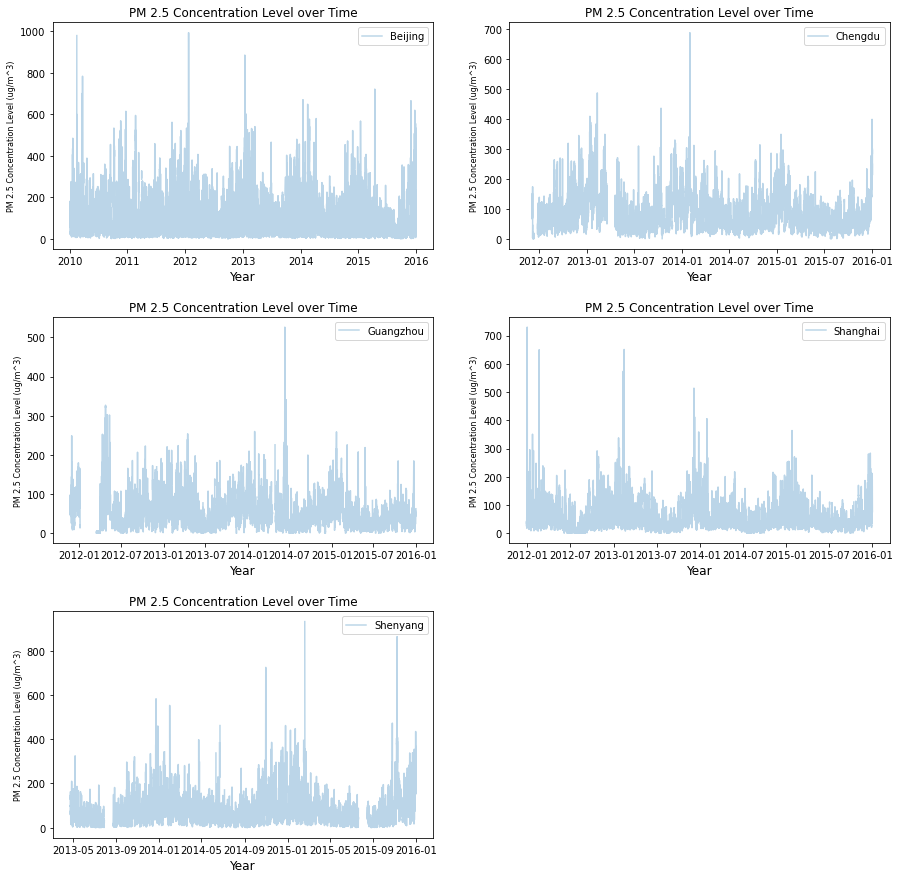

In [30]:
fig = plt.figure(figsize=(15,15))

for i in range(5):
    ax = fig.add_subplot(3,2,i+1)
    plt.plot(df_list[i][1]['PM'], label=df_list[i][0], alpha=0.3)
    plt.title('PM 2.5 Concentration Level over Time', fontsize=12)  
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('PM 2.5 Concentration Level (ug/m^3)', fontsize=8)
    plt.legend()
plt.subplots_adjust(hspace=0.3)
plt.show()

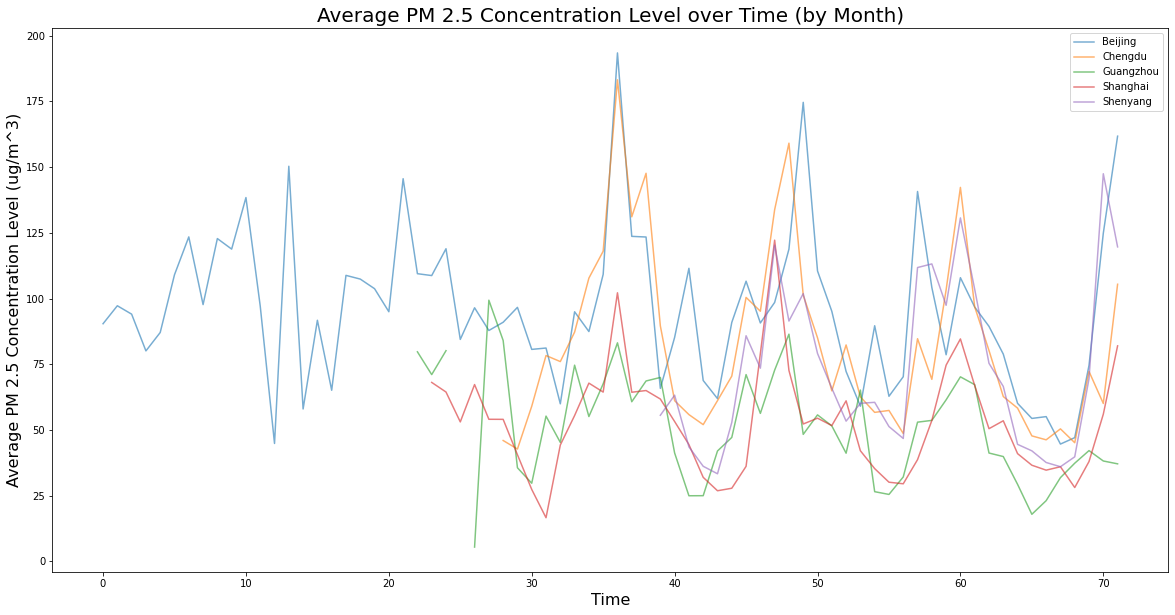

In [31]:
plt.figure(figsize=(20, 10))
ax = axes()
for city, df in df_list:
    plt.plot(df.groupby(['year','month']).mean().reset_index()['PM'], label=city, alpha=0.6)
plt.title('Average PM 2.5 Concentration Level over Time (by Month)', fontsize=20)  
plt.xlabel('Time', fontsize=16)
plt.ylabel('Average PM 2.5 Concentration Level (ug/m^3)', fontsize=16)
plt.legend()
plt.show()

The plot above shows the monthly average PM<sub>2.5</sub> concentration level over time.

---
## 1.3 - Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Train and Evaluate a Linear Regression Model for Predicting PM<sub>2.5</sub>

In [33]:
def do_train_test_split(df):
    # Drop rows that have missing values
    df = df.dropna()
    # Treat the column PM as our predictive objective
    y = df["PM"]
    # All other columns will be used as features when training our model
    X = df.drop(["PM"], axis=1)
    # Split 70% of the data for training and leave out 30% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [34]:
lr = LinearRegression()

##### For Beijing

In [35]:
X_train, X_test, y_train, y_test = do_train_test_split(df_bj)
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.26950638719252373

##### For Chengdu

In [37]:
X_train, X_test, y_train, y_test = do_train_test_split(df_cd)
lr.fit(X_train, y_train);

In [38]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.27412462852835084

##### For Guangzhou

In [39]:
X_train, X_test, y_train, y_test = do_train_test_split(df_gz)
lr.fit(X_train, y_train);

In [40]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.14467127942865

##### For Shanghai

In [41]:
X_train, X_test, y_train, y_test = do_train_test_split(df_sh)
lr.fit(X_train, y_train);

In [42]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.1718142013741748

##### For Shenyang

In [43]:
X_train, X_test, y_train, y_test = do_train_test_split(df_sy)
lr.fit(X_train, y_train);

In [44]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.21522311748622325

##### Evaluating All 5 Cities Together

In [45]:
r2_eval = []
for city, df in df_list_untouched:
    # Drop rows that have missing values
    df = df.dropna()
    # Treat the column PM as our predictive objective
    y = df["PM"]
    # All other columns will be used as features when training our model
    X = df.drop(["PM"], axis=1)
    # Split 70% of the data for training and leave out 30% for testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    r2_eval.append((city, score))

In [46]:
df_r2 = pd.DataFrame(r2_eval, columns =['City', 'R-squared']) 
df_r2

,City,R-squared
0,Beijing,0.269506
1,Chengdu,0.274125
2,Guangzhou,0.144671
3,Shanghai,0.171814
4,Shenyang,0.215223


From the evaluation, we can see that **Linear Regression is doing poorly in predicting the values of PM<sub>2.5</sub>** because it's scoring low on R-squared for all 5 cities.

This is actually surprising to me since the linear plot in the previous section shows a "clear" visual pattern between time of the year and the PM<sub>2.5</sub> concentration level. My speculation is that there could be too much noise in the data, or that Linear Regression model isn't the best model for predicting on this dataset.

### Train Model on One City and Evaluate on Another

In [47]:
# Train on the Beijing dataset
X_train, X_test, y_train, y_test = do_train_test_split(df_bj)
lr.fit(X_train, y_train);

In [48]:
# Split the Guangzhou dataset
X_train, X_test, y_train, y_test = do_train_test_split(df_gz)

In [49]:
# Evaluate on Guangzhou dataset
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

-6.869280049461729

If we use the Linear Regression model trained on the Beijing dataset to predict the PM<sub>2.5</sub> values for Guangzhou, it's doing much worse and gets a negative R-squared score.

In [50]:
# Split the Chengdu dataset
X_train, X_test, y_train, y_test = do_train_test_split(df_cd)

In [51]:
# Evaluate on Chengdu dataset
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

-0.19907310056279748

If we take the same model to predict the the PM<sub>2.5</sub> values for Chengdu, it's still doing worse, but it's not as "bad" as it did with the predictions on the Guangzhou dataset.

### Prediction on Temperature and Precipitation in Shanghai: Easier or Not?

Using the Shanghai dataset:

In [52]:
df = df_sh.dropna()

##### Temperature:

In [53]:
# Using TEMP
y = df["TEMP"]
X = df.drop(["TEMP"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
lr.fit(X_train, y_train);

In [55]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.992046622730797

For this section, I'm **selecting temperature as the feature** to predict on, and **it seems to be easier to predict on**. I think this is because of the stronger correlation between time of the year and the temperature: we can expect summers to have higher temperature and winters to have lower temperature.

##### Precipitation:

In [56]:
# Using Precipitation
y = df["precipitation"]
X = df.drop(["precipitation"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
lr.fit(X_train, y_train);

In [58]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.257166588225351

**Precipitation appears to be harder to predict on** using this Linear Regression model. This could be because, again, Linear Regression model isn't the best model for predicting values for this feature. It could also because there are other factors affecting precipitation that are not captured in this dataset.

---
## Bonus: Which City to Live In - Shanghai or Guangzhou?

### Temperature

In [59]:
temp_tables = average_temp_by_season(df_list)
for city, temp_table in temp_tables:
    if city == 'Guangzhou' or city == 'Shanghai':
        print(city)
        print(temp_table)
        print()

Guangzhou
  season_in_text       TEMP
0         Spring  21.906167
1         Summer  28.203261
2           Fall  23.635798
3         Winter  14.099237

Shanghai
  season_in_text       TEMP
0         Spring  15.982709
1         Summer  27.705798
2           Fall  19.765703
3         Winter   6.227308



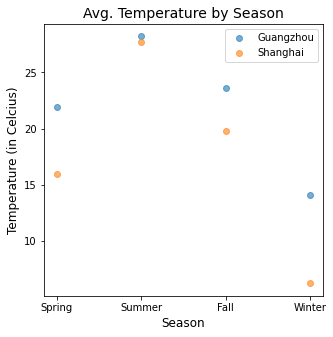

In [60]:
fig = plt.figure(figsize=(5,5))
ax = axes()
for city, temp_table in temp_tables:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(temp_table['season_in_text'], temp_table['TEMP'], 
                 marker="o", linestyle="", label=city, alpha=0.6)
plt.title('Avg. Temperature by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Temperature (in Celcius)', fontsize=12)
locs, labels = xticks()
xticks([0, 1, 2, 3], 
       ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend();

In [61]:
temp_stats = []
for city, df in df_list:
    season_stats = df.groupby(['month'])[['TEMP', 'season']].agg(['min', 'max', 'mean', 'median'])['TEMP'].reset_index()
    temp_stats.append((city, season_stats))

In [62]:
for city, temp_stat in temp_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        print(city)
        print(temp_stat)
        print()

Guangzhou
    month   min        max       mean  median
0       1   1.7  26.200000  12.853853    12.5
1       2   2.4  28.200000  15.440212    15.5
2       3   5.4  29.000000  18.093772    18.1
3       4   9.7  33.500000  21.952778    22.0
4       5  16.8  34.400000  25.673454    25.6
5       6  20.1  36.200000  27.788148    27.4
6       7  22.8  37.400002  28.447043    28.0
7       8  22.0  36.800000  28.361201    27.6
8       9  18.0  35.600000  27.053403    26.3
9      10  11.7  33.200000  23.590345    23.5
10     11   6.4  31.900000  20.265162    20.1
11     12   1.9  27.900000  14.126216    14.0

Shanghai
    month   min   max       mean  median
0       1  -5.0  21.0   5.117093     5.0
1       2  -3.0  24.0   6.593688     6.0
2       3  -2.0  31.0  10.550650    10.0
3       4   4.0  32.0  15.900208    16.0
4       5  12.0  36.0  21.493390    21.0
5       6  17.0  37.0  24.420699    24.0
6       7  18.0  41.0  29.433020    29.0
7       8  20.0  41.0  29.157293    29.0
8       9  16

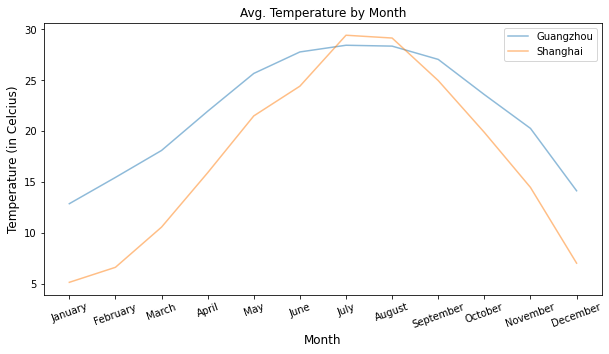

In [63]:
fig = plt.figure(figsize=(10,5))

for city, temp_stat in temp_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(temp_stat['month'], temp_stat['mean'], label=city, alpha=0.5)
plt.title('Avg. Temperature by Month', fontsize=12)  
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (in Celcius)', fontsize=12)
locs, labels = xticks()
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
       rotation=20)
plt.legend()
plt.show();

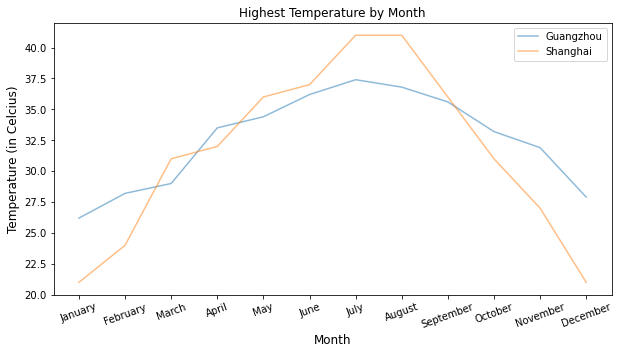

In [64]:
fig = plt.figure(figsize=(10,5))

for city, temp_stat in temp_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(temp_stat['month'], temp_stat['max'], label=city, alpha=0.5)
plt.title('Highest Temperature by Month', fontsize=12)  
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (in Celcius)', fontsize=12)
locs, labels = xticks()
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
       rotation=20)
plt.legend()
plt.show();

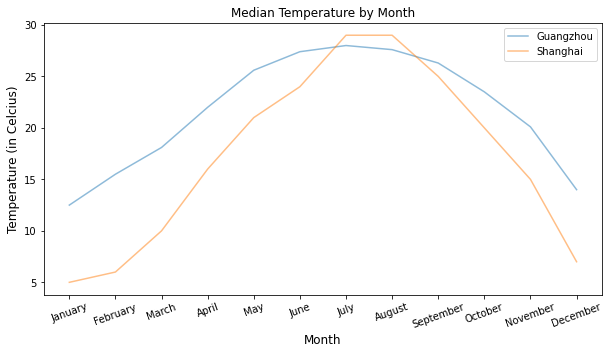

In [65]:
fig = plt.figure(figsize=(10,5))

for city, temp_stat in temp_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(temp_stat['month'], temp_stat['median'], label=city, alpha=0.5)
plt.title('Median Temperature by Month', fontsize=12)  
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (in Celcius)', fontsize=12)
locs, labels = xticks()
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
       rotation=20)
plt.legend()
plt.show();

In [66]:
data = count_days_with_temp(df_list, 27, 5)

In [67]:
df = pd.DataFrame(data, columns=['city','hot_summer_days','cold_winter_days'])
df

,city,hot_summer_days,cold_winter_days
0,Beijing,180,536
1,Chengdu,199,69
2,Guangzhou,426,1
3,Shanghai,328,202
4,Shenyang,17,538


In [68]:
data = count_days_with_temp(df_list, 30, 5)

In [69]:
df = pd.DataFrame(data, columns=['city','hot_summer_days','cold_winter_days'])
df

,city,hot_summer_days,cold_winter_days
0,Beijing,16,536
1,Chengdu,15,69
2,Guangzhou,79,1
3,Shanghai,173,202
4,Shenyang,0,538


### PM<sub>2.5</sub> Concentration Level

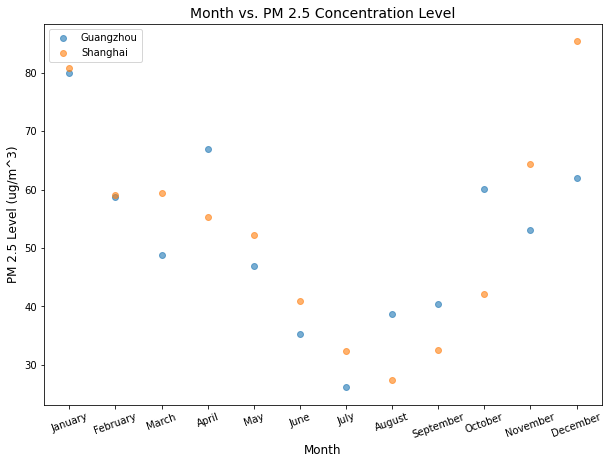

In [70]:
fig = plt.figure(figsize=(10,7))
ax = axes()
for city, df in df_list:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(df.groupby('month')['month'].mean(), df.groupby('month')['PM'].mean(), 
                 marker="o", linestyle="", label=city, alpha=0.6)

plt.title('Month vs. PM 2.5 Concentration Level', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('PM 2.5 Level (ug/m^3)', fontsize=12)
locs, labels = xticks()
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
       ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
       rotation=20)
plt.legend();

In [71]:
pm_stats = []
for city, df in df_list:
    season_avg = df.groupby(['season_in_text'])[['PM', 'season']].mean().sort_values(by=['season'], ascending=True).reset_index().drop('season', axis=1)
    pm_stats.append((city, season_avg))

In [72]:
for city, pm_stat in pm_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        print(city)
        print(pm_stat)
        print()

Guangzhou
  season_in_text         PM
0         Spring  54.012261
1         Summer  33.381025
2           Fall  51.136927
3         Winter  66.521513

Shanghai
  season_in_text         PM
0         Spring  55.710267
1         Summer  33.562076
2           Fall  46.334326
3         Winter  75.663666



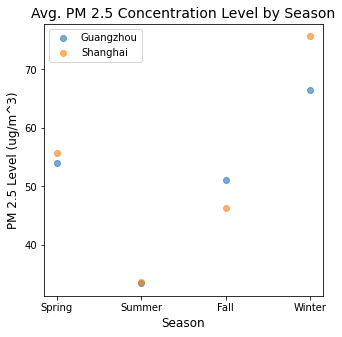

In [73]:
fig = plt.figure(figsize=(5,5))
ax = axes()
for city, pm_stat in pm_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        plt.plot(pm_stat['season_in_text'], pm_stat['PM'], 
                 marker="o", linestyle="", label=city, alpha=0.6)

plt.title('Avg. PM 2.5 Concentration Level by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('PM 2.5 Level (ug/m^3)', fontsize=12)
locs, labels = xticks()
xticks([0, 1, 2, 3], 
       ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend();

In [74]:
pm_stats = []
for city, df in df_list:
    season_avg = df[['PM']].mean()
    pm_stats.append((city, season_avg))

In [75]:
for city, pm_stat in pm_stats:
    if city == 'Guangzhou' or city == 'Shanghai':
        print(city)
        print(pm_stat)
        print()

Guangzhou
PM    50.803938
dtype: float64

Shanghai
PM    52.910544
dtype: float64

